
# Agenda
* What is the drawback of using the train/test split procedure for model evaluation?
* How does K-fold cross-validation overcome this limitation?
* How can cross-validation be used for selecting tuning parameters, choosing between models, and selecting features?
* What are some possible improvements to cross-validation?


# Review of model evaluation procedures
* Motivation: Need a way to choose between machine learning models

* Goal is to estimate likely performance of a model on out-of-sample data

#### Initial idea: Train and test on the same data

* But, maximizing training accuracy rewards overly complex models which overfit the training data

####  Alternative idea: Train/test split

* Split the dataset into two pieces, so that the model can be trained and tested on different data
* Testing accuracy is a better estimate than training accuracy of out-of-sample performance
* But, it provides a high variance estimate since changing which observations happen to be in the * testing set can significantly change testing accuracy

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [26]:
#read in the iris dataset
iris = load_iris()

# create X(metrics) and y(vector)
X = iris.data
y = iris.target 

# Check the output with different values of random_states

In [27]:
# use train/test split with DIFFERENT random_state values
X_train , X_test , y_train , y_test = train_test_split(X  , y ,  random_state=5)

# check classification accuracy of KNN with K=5
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(metrics.accuracy_score(y_pred , y_test))

0.9473684210526315


## Question: 
\*What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?\*

## Answer: 
* That's the essense of cross-validation!

# Steps for K-fold cross-validation¶
* Split the dataset into K equal partitions (or "folds").
* Use fold 1 as the testing set and the union of the other folds as the training set.
* Calculate testing accuracy.
* **Repeat steps 2 and 3 K times, using a different fold as the testing set each time.**
* Use the average testing accuracy as the estimate of out-of-sample accuracy.



In [16]:
%%html
<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" ,width=200, height=200 >

# Focus on the output of the following code 
## Don't mess with the code

In [19]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf=KFold(n_splits=5 , shuffle=False ).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


* Dataset contains 25 observations (numbered 0 through 24)
* 5-fold cross-validation, thus it runs for 5 iterations
* For each iteration, every observation is either in the training set or the testing set, but not both
* Every observation is in the testing set exactly once


# Comparing cross-validation to train/test split
## Advantages of cross-validation:

* More accurate estimate of out-of-sample accuracy
* More "efficient" use of data (every observation is used for both training and testing)
## Advantages of train/test split:

* Runs K times faster than K-fold cross-validation
* Simpler to examine the detailed results of the testing process
# Cross-validation recommendations
* K can be any number, but K=10 is generally recommended
* For classification problems, **stratified sampling** is recommended for creating the folds

* Each response class should be represented with equal proportions in each of the K folds

* scikit-learn's cross_val_score function does this by default


# Cross-validation example: parameter tuning
* Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [21]:
from sklearn.model_selection import cross_val_score

In [27]:
# 10-fold cross_validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X,y,cv=10,scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [29]:
# mean of the cross_val_score result obtained in scores

print(scores.mean())

0.9666666666666668


In [32]:
# search for an optimal value of K in KNN
# k_range = list(range(1, 31))
# k_range


range

In [34]:
k_range = list(range(1,31))
k_scores = []

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)

    

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0.5, 0, 'K_value')

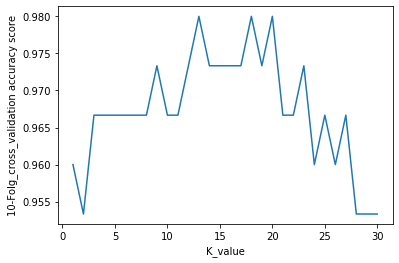

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)

plt.plot( k_range, k_scores)
plt.ylabel('10-Folg_cross_validation accuracy score')
plt.xlabel('K_value')


# Cross-validation example: model selection
* Goal: Compare the best KNN model with logistic regression on the iris dataset

In [12]:
from sklearn.datasets import load_iris
iris=load_iris()
# type(iris)
features=iris.data
target=iris.target

In [17]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [28]:
# import pandas as pd
# cols=iris.feature_names
# # target_names
# X=pd.DataFrame(features , columns=cols  )
# y=pd.DataFrame(target , columns=['target'])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean())


0.9800000000000001


In [35]:
# 10 fold cross validation with logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
print(cross_val_score(lr,X,y,cv=10,scoring='accuracy').mean())


0.9533333333333334


C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

# Cross-validation example: feature selection¶
## Advertising data to be used now
* Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [46]:
cd data

C:\Users\iahuj\desktop\scikit-learn-videos-master\scikit-learn-videos-master\data


In [107]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [108]:
data=pd.read_csv('Advertising.csv', index_col=0)

In [109]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [110]:

X = data[['TV','Radio','Newspaper']]
X

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [111]:
# select the Sales column as the response (y)
y=data.Sales

In [112]:
type(y)

pandas.core.series.Series

In [113]:
# 10-fold cross-validation with all three features
lnrg = LinearRegression()
scores=(cross_val_score( lnrg,X,y,cv=10,scoring='neg_mean_squared_error'))
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [114]:
# fixing the sign of MSE score
mse_scores=-scores
type(mse_scores)

numpy.ndarray

In [115]:
# convert from MSE to RMSE
RMSE_scores=np.sqrt(mse_scores)

In [116]:
# taking the mean of RMSE_scores
RMSE_scores.mean()

1.6913531708051792

In [117]:
# 10 fold cross_validation for 2 variable (excluding newspaper column)
X=data[['TV','Radio']]
y=data['Sales']
scores_2=np.sqrt(-cross_val_score(lnrg , X, y , cv=10 , scoring ='neg_mean_squared_error' )).mean()
print(scores_2)

1.6796748419090766


# Thus, droping the newspaper column from the dataset is wise decision


# Improvements to cross validation


## Repeated cross-validation

* Repeat cross-validation multiple times (with different random splits of the data) and average the results
* More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation

## Creating a hold-out set

* "Hold out" a portion of the data before beginning the model building process
* Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
* More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample

## Feature engineering and selection within cross-validation iterations

* Normally, feature engineering and selection occurs before cross-validation
* Instead, perform all feature engineering and selection within each cross-validation iteration
* More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data